In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

(720, 1280)


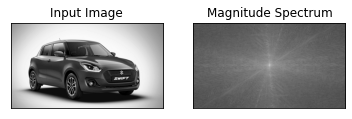

In [45]:
img = cv2.imread('car.jpg',0) ## read image as grayscale
f = np.fft.fft2(img) ## pass grayscale image
fshift = np.fft.fftshift(f) ## Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) ## apply logarithm, otherwise the image can not identify easily, change and see the changes.
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

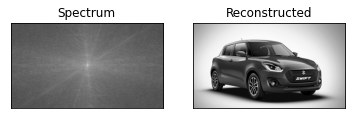

In [12]:
I2 = np.fft.ifft2(f) # f is transformed image
I3 = np.real(I2) # get the real part
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I3, cmap = 'gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])
plt.show()

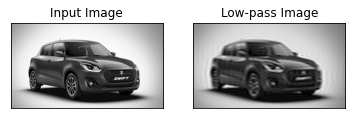

In [12]:
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1# apply mask and inverse DFT)
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low-pass Image'), plt.xticks([]), plt.yticks([])
plt.show()

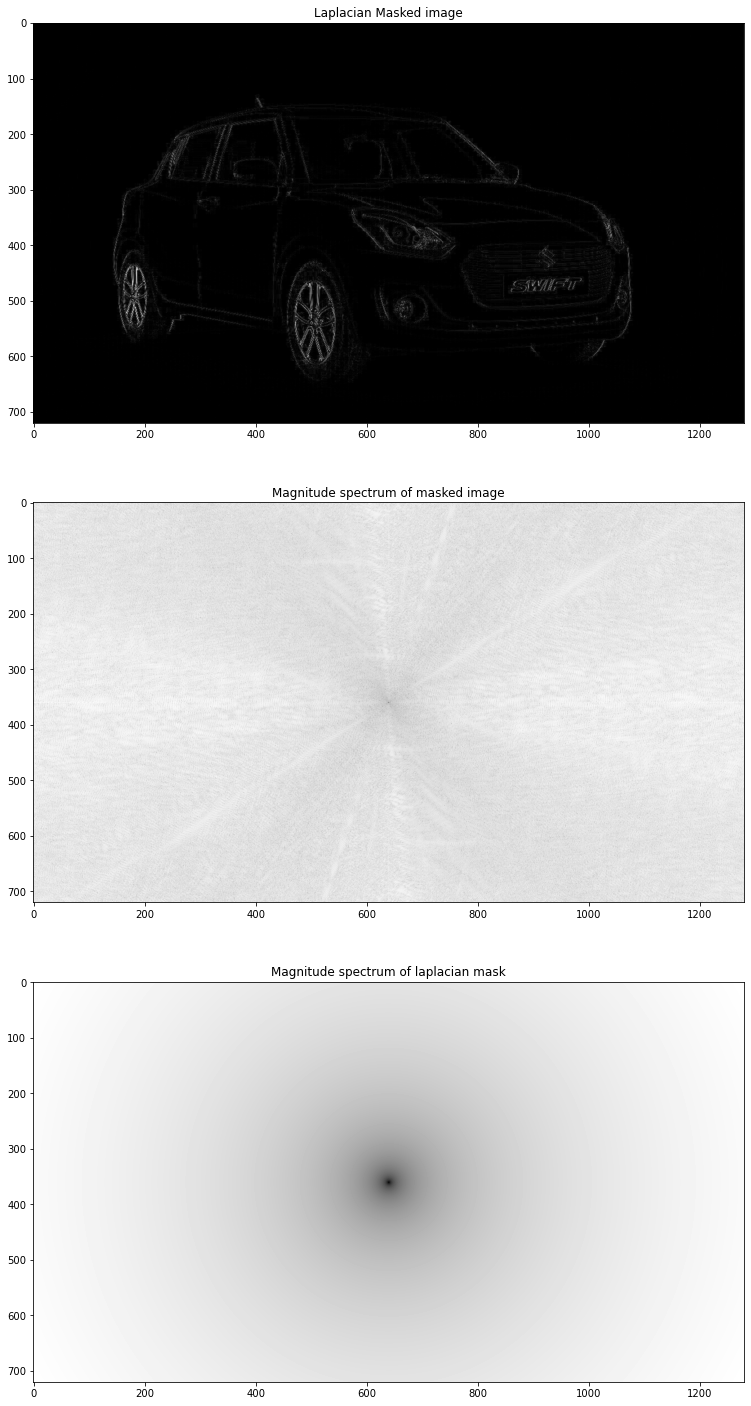

In [30]:
#Tasks
#1) Apply high pass laplacian filter on Car.jpg image
img = cv2.imread('car.jpg',0)
img_float32 = np.float32(img)

rows, cols = img.shape

mask = np.zeros((rows, cols), np.float32)

#getting the furier transform of the image
fft = np.fft.fft2(img_float32)
fft_shift = np.fft.fftshift(fft)

#laplacian mask for fourier domain
for i in range(rows):
    for j in range (cols):
        mask[i,j] = -((i-(rows/2))**2 + (j-(cols/2))**2)
        
#applying the mask to the image in fourier domain
masked = fft_shift*mask 

#Shift the zero-frequency component to the center of the spectrum
f_ishift = np.fft.ifftshift(masked) 

#getting inverse fast fourier trasform
img_back = np.fft.ifft2(f_ishift)

#get the magnitude of the image
img_back = np.absolute(img_back)

plt.figure(figsize=(25,25))

plt.subplot(311)
plt.title('Laplacian Masked image')
plt.imshow(img_back, cmap = 'gray')

plt.subplot(312)
plt.title('Magnitude spectrum of masked image')
magnitude_spectrum_masked = 20*np.log(np.abs(masked)+1)
plt.imshow(magnitude_spectrum_masked , cmap = 'gray')

plt.subplot(313)
plt.title('Magnitude spectrum of laplacian mask')
magnitude_spectrum_mask = 20*np.log(np.abs(mask)+1)
plt.imshow(magnitude_spectrum_mask , cmap = 'gray')


In [33]:
#function to only return the laplacian highpass filtered image

def laplacian_highpass_filtered(img):
    img_float32 = np.float32(img)

    rows, cols = img.shape

    mask = np.zeros((rows, cols), np.float32)

    #getting the furier transform of the image
    fft = np.fft.fft2(img_float32)
    fft_shift = np.fft.fftshift(fft)

    #laplacian mask for fourier domain
    for i in range(rows):
        for j in range (cols):
            mask[i,j] = -((i-(rows/2))**2 + (j-(cols/2))**2)
        
    #applying the mask to the image in fourier domain
    masked = fft_shift*mask 

    #Shift the zero-frequency component to the center of the spectrum
    f_ishift = np.fft.ifftshift(masked) 

    #getting inverse fast fourier trasform
    img_back = np.fft.ifft2(f_ishift)

    #get the magnitude of the image
    img_back = np.absolute(img_back)

    return img_back




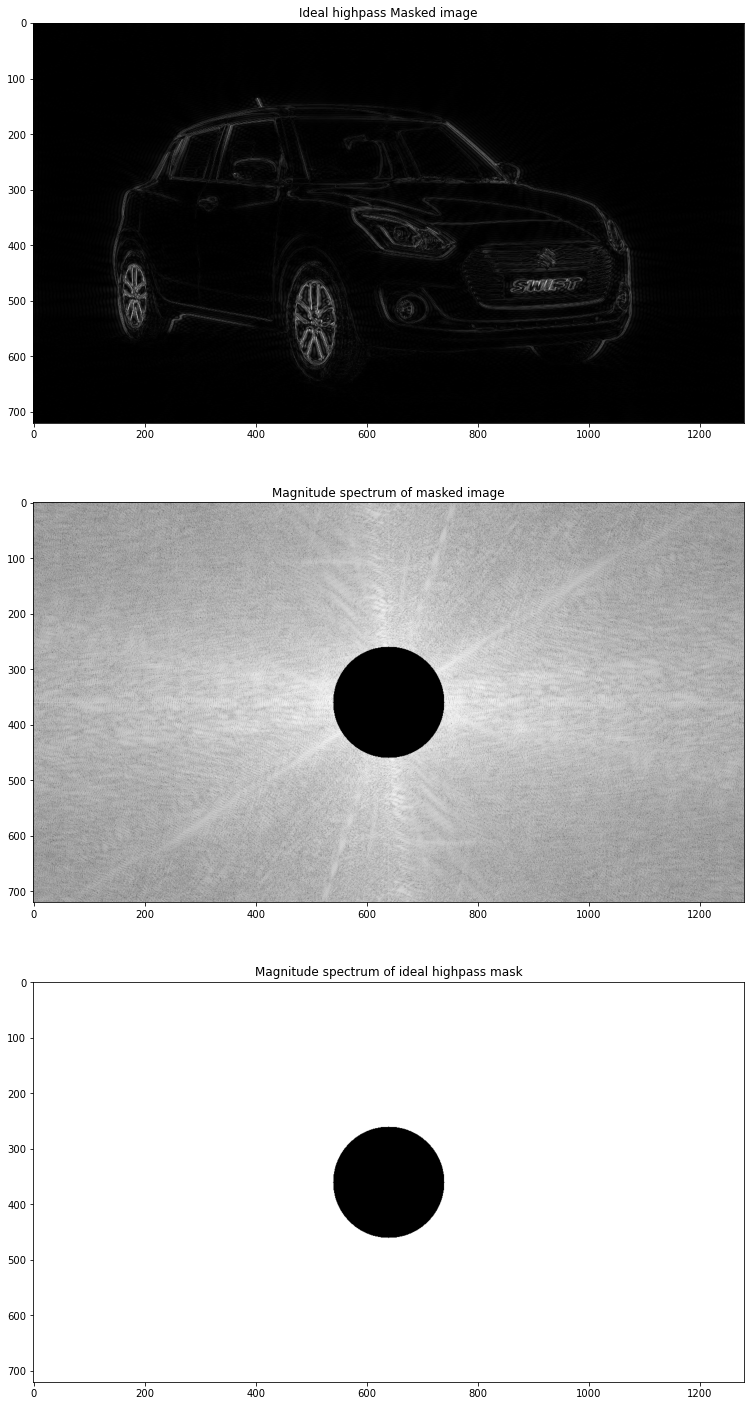

In [32]:
#2) Apply ideal high-pass filter on Car.jpg image for D0=100
D0 = 100
img = cv2.imread('car.jpg',0)
img_float32 = np.float32(img)

rows, cols = img.shape

mask = np.zeros((rows, cols), np.float32)

#getting the furier transform of the image
fft = np.fft.fft2(img_float32)
fft_shift = np.fft.fftshift(fft)

#ideal high pass foltering mask for fourier domain
for i in range(rows):
    for j in range (cols):
        k =  np.sqrt(((i-(rows/2))**2) + ((j-(cols/2))**2))
        
        if k > D0:
            mask[i,j] = 1
        else:
            mask[i,j] = 0
        
#applying the mask to the image in fourier domain
masked = fft_shift*mask 

#Shift the zero-frequency component to the center of the spectrum
f_ishift = np.fft.ifftshift(masked) 

#getting inverse fast fourier trasform
img_back = np.fft.ifft2(f_ishift)

#get the magnitude of the image
img_back = np.absolute(img_back)

plt.figure(figsize=(25,25))

plt.subplot(311)
plt.title('Ideal highpass Masked image')
plt.imshow(img_back, cmap = 'gray')

plt.subplot(312)
plt.title('Magnitude spectrum of masked image')
magnitude_spectrum_masked = 20*np.log(np.abs(masked)+1)
plt.imshow(magnitude_spectrum_masked , cmap = 'gray')

plt.subplot(313)
plt.title('Magnitude spectrum of ideal highpass mask')
magnitude_spectrum_mask = 20*np.log(np.abs(mask)+1)
plt.imshow(magnitude_spectrum_mask , cmap = 'gray')





In [96]:
def gaussian_lowpass_filter(img, D0):
    
    img_float32 = np.float32(img)

    rows, cols = img.shape

    mask = np.zeros((rows, cols), np.float32)

    #getting the furier transform of the image
    fft = np.fft.fft2(img_float32)
    fft_shift = np.fft.fftshift(fft)

    #generating gaussian low pass filter mask for fourier domain
    for i in range(rows):
        for j in range (cols):
            D = np.sqrt(((i-(rows/2))**2) + ((j-(cols/2))**2))
            mask[i,j] = np.exp(-(D**2)/(2*(D0**2)))
        
    #applying the mask to the image in fourier domain
    masked = fft_shift*mask 

    #Shift the zero-frequency component to the center of the spectrum
    f_ishift = np.fft.ifftshift(masked) 

    #getting inverse fast fourier trasform
    img_back = np.fft.ifft2(f_ishift)

    #get the magnitude of the image
    img_back = np.absolute(img_back)
 
    
    return img_back.astype('uint8')

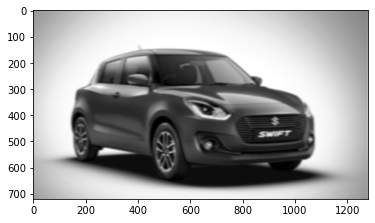

In [101]:
plt.imshow(gaussian_lowpass_filter(img,50), cmap = 'gray')

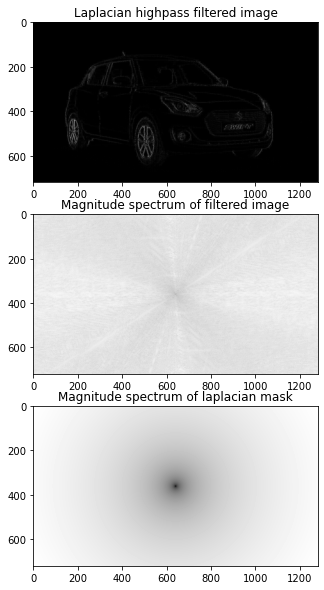

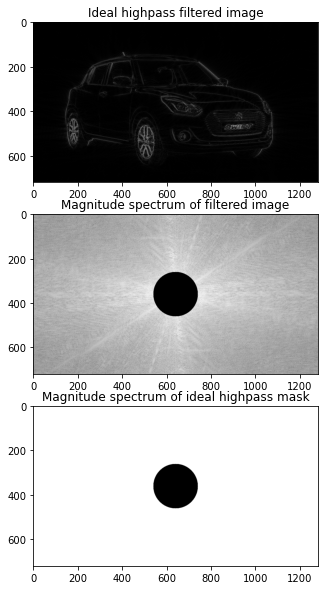

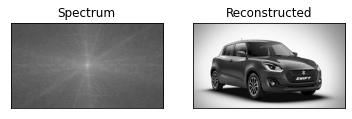

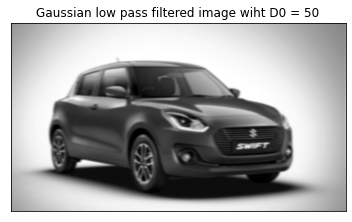

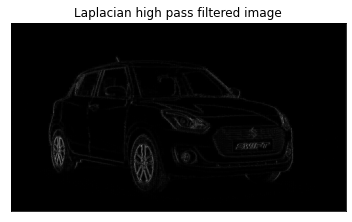

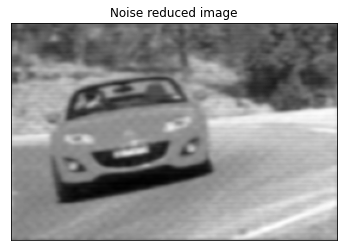

In [99]:
def main():
  #Tasks
  #1) Apply high pass laplacian filter on Car.jpg image
    img = cv2.imread('car.jpg',0)
    img_float32 = np.float32(img)

    rows, cols = img.shape

    mask = np.zeros((rows, cols), np.float32)

    #getting the furier transform of the image
    fft = np.fft.fft2(img_float32)
    fft_shift = np.fft.fftshift(fft)

    #laplacian mask for fourier domain
    for i in range(rows):
        for j in range (cols):
            mask[i,j] = -((i-(rows/2))**2 + (j-(cols/2))**2)

    #applying the mask to the image in fourier domain
    masked = fft_shift*mask 

    #Shift the zero-frequency component to the center of the spectrum
    f_ishift = np.fft.ifftshift(masked) 

    #getting inverse fast fourier trasform
    img_back = np.fft.ifft2(f_ishift)

    #get the magnitude of the image
    img_back = np.absolute(img_back)

    plt.figure(figsize=(10,10))

    plt.subplot(311)
    plt.title('Laplacian highpass filtered image')
    plt.imshow(img_back, cmap = 'gray')

    plt.subplot(312)
    plt.title('Magnitude spectrum of filtered image')
    magnitude_spectrum_masked = 20*np.log(np.abs(masked)+1)
    plt.imshow(magnitude_spectrum_masked , cmap = 'gray')

    plt.subplot(313)
    plt.title('Magnitude spectrum of laplacian mask')
    magnitude_spectrum_mask = 20*np.log(np.abs(mask)+1)
    plt.imshow(magnitude_spectrum_mask , cmap = 'gray')
    
    #2) Apply ideal high-pass filter on Car.jpg image for D0=100
    D0 = 100
    img_float32 = np.float32(img)

    rows, cols = img.shape

    mask2 = np.zeros((rows, cols), np.float32)

    #getting the furier transform of the image
    fft = np.fft.fft2(img_float32)
    fft_shift = np.fft.fftshift(fft)

    #ideal high pass foltering mask for fourier domain
    for i in range(rows):
        for j in range (cols):
            k =  np.sqrt(((i-(rows/2))**2) + ((j-(cols/2))**2))

            if k > D0:
                mask2[i,j] = 1
            else:
                mask2[i,j] = 0

    #applying the mask to the image in fourier domain
    masked2 = fft_shift*mask2 

    #Shift the zero-frequency component to the center of the spectrum
    f_ishift = np.fft.ifftshift(masked2) 

    #getting inverse fast fourier trasform
    img_back2 = np.fft.ifft2(f_ishift)

    #get the magnitude of the image
    img_back2 = np.absolute(img_back2)

    plt.figure(figsize=(10,10))
    
    plt.subplot(311)
    plt.title('Ideal highpass filtered image')
    plt.imshow(img_back2, cmap = 'gray')

    plt.subplot(312)
    plt.title('Magnitude spectrum of filtered image')
    magnitude_spectrum_masked = 20*np.log(np.abs(masked2)+1)
    plt.imshow(magnitude_spectrum_masked , cmap = 'gray')

    plt.subplot(313)
    plt.title('Magnitude spectrum of ideal highpass mask')
    magnitude_spectrum_mask = 20*np.log(np.abs(mask2)+1)
    plt.imshow(magnitude_spectrum_mask , cmap = 'gray')
    plt.show()
    
    #3) Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.
    
    #FFT2, IFFT2
    f = np.fft.fft2(img) #fft2
    fshift = np.fft.fftshift(f)
    I2 = np.fft.ifft2(f) # f is transformed image usign ifft2
    I3 = np.absolute(I2) # getting magnitude of the image
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift)+1)
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(I3, cmap = 'gray')
    plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #low-pass Gaussian filter
    gaussian_filtered_img = gaussian_lowpass_filter(img, 50)
    plt.imshow(gaussian_filtered_img, cmap = 'gray')
    plt.title('Gaussian low pass filtered image wiht D0 = 50'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #high-pass laplacian filter
    laplacian_filtered_img = laplacian_highpass_filtered(img)
    plt.imshow(laplacian_filtered_img, cmap = 'gray')
    plt.title('Laplacian high pass filtered image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #4) Apply the necessary filter and correct the noize in the image. Image file is uploaded.
    img2 = cv2.imread('car-2.jpg',0)
    noise_reduced_image = gaussian_lowpass_filter(img2, 23)
    plt.imshow(noise_reduced_image, cmap = 'gray')
    plt.title('Noise reduced image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    
    
    
    

    
    
if __name__ == "__main__":
    main()
    